# Clustering (ML Lab Assessment 2)

# Sanjoi Sethi (18BCE2261)

# 1) Partition Based Methods: K-Means Algorithm

# (i) Importing the dataset

In [1]:
import pandas as pd
beverages_df=pd.read_csv("bev.csv")
beverages_df.head(5)

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


# (ii) Importing the libraries

In [2]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# (iii) Scaling the features

In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_beverages_df=scaler.fit_transform(beverages_df[["Potassium", "Sodium", "Caffeine", "Cost"]])
scaled_beverages_df[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

# (iv) K-Means Clustering

In [4]:
from sklearn.cluster import KMeans
clusters=KMeans(3)
clusters.fit(scaled_beverages_df)
beverages_df["clusterid"]=clusters.labels_

# (v) Peak at the dataset

In [5]:
beverages_df.head(5)

,Name,Potassium,Sodium,Caffeine,Cost,clusterid
0,new_england_coffee,144,15,4.7,0.43,2
1,post_alley_blend,151,19,4.9,0.43,2
2,stumpdown_coffee,157,15,0.9,0.48,1
3,bizzy_organic_coffee,170,7,5.2,0.73,0
4,indian_bean,152,11,5.0,0.77,0


# (vi) Plotting the clusters formed

C:\Users\SanJoi\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


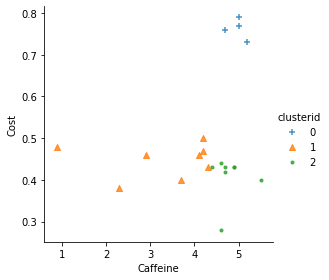

In [6]:
markers = ['+', '^', '.']
sn.lmplot("Caffeine", "Cost", data=beverages_df, hue ="clusterid", fit_reg= False, markers=markers, size=4)

# 2) Hierarchial Methods: Agglomerative Algorithm

# (i) The dataset is already imported

# (ii) The libraries are already imported

# (iii) The features are already scaled

# (iv) Agglomerative Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
clusters=AgglomerativeClustering(3)
clusters.fit(scaled_beverages_df)
beverages_df["aglo_clusterid"]=clusters.labels_

# (v) Peak at the dataset

In [8]:
beverages_df.head(5)

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,aglo_clusterid
0,new_england_coffee,144,15,4.7,0.43,2,1
1,post_alley_blend,151,19,4.9,0.43,2,1
2,stumpdown_coffee,157,15,0.9,0.48,1,0
3,bizzy_organic_coffee,170,7,5.2,0.73,0,2
4,indian_bean,152,11,5.0,0.77,0,2


# (vi) Plotting a dendrogram to visualize the clusters formed

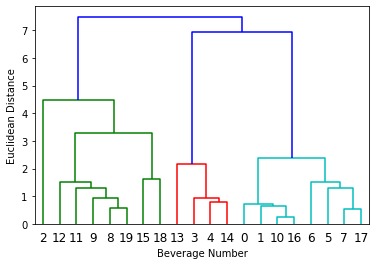

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
dendrogram(linkage(scaled_beverages_df, method='ward'))
plt.xlabel("Beverage Number")
plt.ylabel("Euclidean Distance")
plt.show()

# (vii) Plotting the clusters formed

C:\Users\SanJoi\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


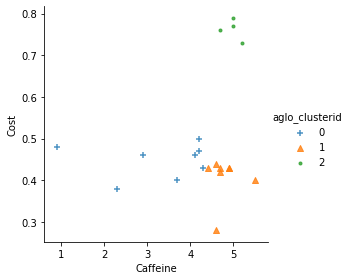

In [10]:
markers = ['+', '^', '.']
sn.lmplot("Caffeine", "Cost", data=beverages_df, hue ="aglo_clusterid", fit_reg= False, markers=markers, size=4)

Observation Deduced: From the graphs of both the clustering methods, we can easily conclude that both the methods give similar kinds of clusters as the same parameter (Euclidean Distance) is being used to form the clusters. The only difference that can be gauged though, is the difference in the cluster id for between the K-means and Agglomerative Clutsering methods. The value counts below clearly show how different notation show different clusters but the division of points still remains the same.

In [11]:
beverages_df['clusterid'].value_counts()

2    8
1    8
0    4
Name: clusterid, dtype: int64

In [12]:
beverages_df['aglo_clusterid'].value_counts()

1    8
0    8
2    4
Name: aglo_clusterid, dtype: int64